# Imports

In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_digits, fetch_openml
# from keras.datasets import mnist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
# mnist = load_digits()
# df = pd.DataFrame(mnist.data)
# df.head()
# tframe = pd.DataFrame(mnist.target)
# tframe.head()
X, y = load_digits(return_X_y=True)
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [5]:
dtc = tree.DecisionTreeClassifier()
# scores = cross_val_score(dtc, X, y, cv=5, error_score='raise')
# print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8706428571428572
Precision: 0.8704472955463308
Recall: 0.8706428571428572
F1 Score: 0.8704937123511105


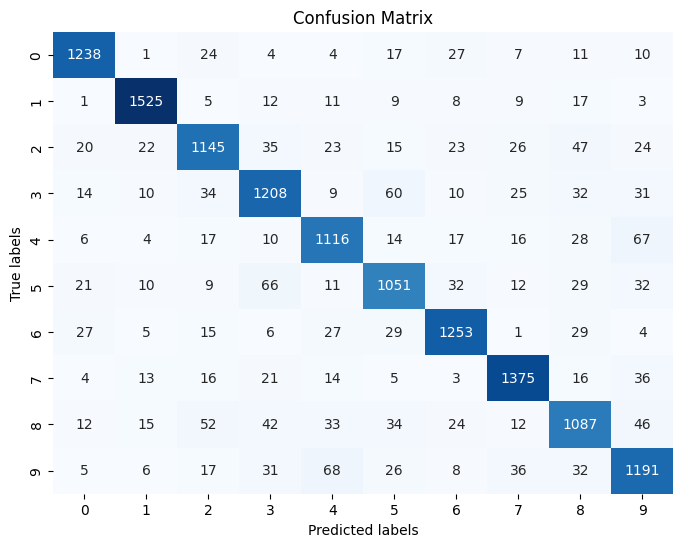

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('dtcConMat.png')
plt.show()

In [23]:
param_grid = {
    'max_depth': [None, 20],
    'min_samples_split': [5,7],
    'min_samples_leaf': [4, 5, 6],
    # 'max_features': [None, 'sqrt', 'log2']
}

dtc = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.8752142857142857


In [31]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

dtc = tree.DecisionTreeClassifier()

grid_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
Accuracy: 0.8689285714285714


# Random Forest

In [9]:
rfc = RandomForestClassifier()
# scores = cross_val_score(rfc, X, y, cv=5)
# print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9676428571428571
Precision: 0.9676423921173987
Recall: 0.9676428571428571
F1 Score: 0.967624189639289


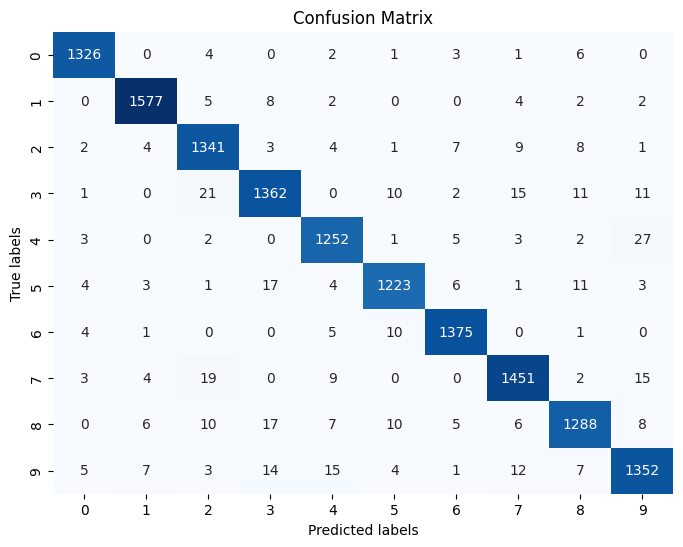

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('rfcConMat.png')
plt.show()

In [16]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 300}
Accuracy: 0.9689285714285715


# Naive Bayes

#### Gaussian

In [13]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.5566 accuracy with a standard deviation of 0.0063


#### Multinomial

In [14]:
gnb = MultinomialNB()
scores = cross_val_score(gnb, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.8256 accuracy with a standard deviation of 0.0104


#### Bernoulli

In [15]:
gnb = BernoulliNB()
# scores = cross_val_score(gnb, X, y, cv=5)
# print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8348571428571429
Precision: 0.8367482492867026
Recall: 0.8348571428571429
F1 Score: 0.8346397011541737


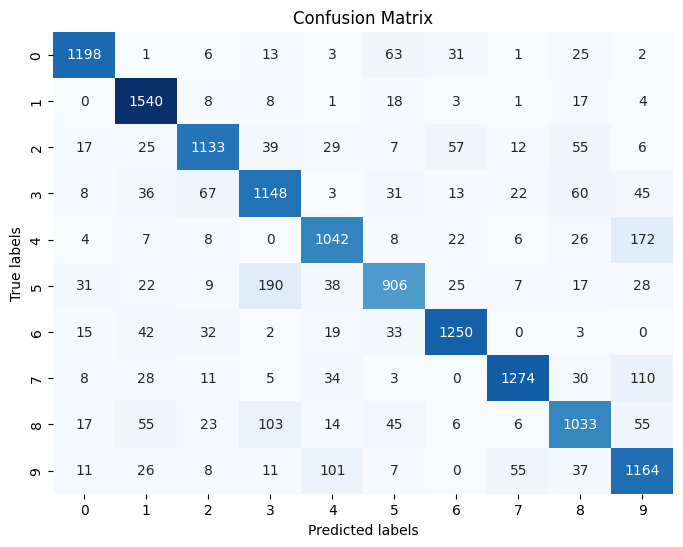

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('nbbConMat.png')
plt.show()

In [18]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.1, 0.5]
}

bnb = BernoulliNB()

grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'alpha': 0.1, 'binarize': 0.0}
Accuracy: 0.8352857142857143


# KNN

In [19]:
knc = KNeighborsClassifier()
# scores = cross_val_score(knc, X, y, cv=5)
# print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9700714285714286
Precision: 0.9702368001894589
Recall: 0.9700714285714286
F1 Score: 0.9700163750952855


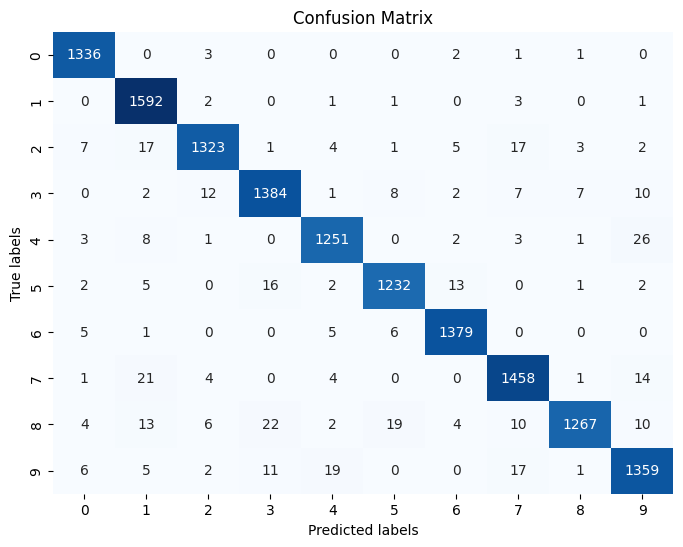

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('knnConMat.png')
plt.show()

In [15]:
param_grid = {
    'n_neighbors': [3, 5],
    'p': [2],
    'weights': ['uniform', 'distance']
}

knc = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9728571428571429


# Neural Network

In [20]:
mlpc = MLPClassifier() #Check NN Classifier?
# scores = cross_val_score(mlpc, X, y, cv=5)
# print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9664285714285714
Precision: 0.9665301536354525
Recall: 0.9664285714285714
F1 Score: 0.9664394053197846


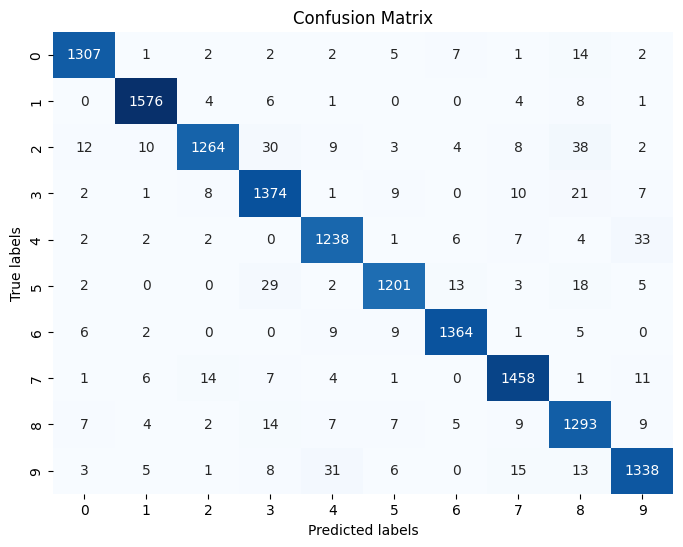

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('nnConMat.png')
plt.show()

In [5]:
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.001,0.005, 0.01]
}

mlpc = MLPClassifier()

grid_search = GridSearchCV(estimator=mlpc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'activation': 'relu', 'alpha': 0.001}
Accuracy: 0.9615


In [19]:
param_grid = {
    'hidden_layer_sizes': [(300,), (500,), (700,)],
    'alpha': [0.001,]
}

mlpc = MLPClassifier()

grid_search = GridSearchCV(estimator=mlpc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'alpha': 0.001, 'hidden_layer_sizes': (500,)}
Accuracy: 0.9741428571428571


In [12]:
param_grid = {
    'activation':['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.0005, 0.001],
}

mlpc = MLPClassifier()

grid_search = RandomizedSearchCV(estimator=mlpc, param_distributions=param_grid,n_iter=6, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'alpha': 0.001, 'activation': 'relu'}
Accuracy: 0.9605
